In [1]:
import numpy as np
import pandas as pd

In [2]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity="all"

In [3]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## pandas의 plot으로 데이터 시각화

**pandas의 그래프기능 : matplotlib.pyplot 기반으로 만들어짐**

https://pandas.pydata.org/docs/user_guide/visualization.html

#### 형식1.
- Series_data.plot([kind='graph_kind'][, option])


- DataFrame_data.plot([x=label 혹은 position, y=label 혹은 position,] [kind='graph_kind'][, option])



- kind 옵션
    - line : 선그래프
    - scatter : 산점도(데이터프레임에서만 가능)
    - bar : 수직막대그래프
    - barh : 수평막대그래프
    - hist : 히스토그램
    - pie : 파이그래프
    - box : 박스 플롯
    - area : area 플롯
    - density : Kernel Density Estimation 플롯
    - kde : Kernel Density Estimation 플롯

#### 형식2.


- 수직막대그래프
    - Series_data.plot.bar([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.bar([x=label 혹은 position, y=label 혹은 position][, option])


- 수평막대그래프
    - Series_data.plot.barh([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.barh([x=label 혹은 position, y=label 혹은 position][, option])
    
    
- 파이그래프
    - Series_data.plot.pie([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.pie([x=label 혹은 position, y=label 혹은 position][, option])
    

- 선그래프
    - Series_data.plot.line([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.line([x=label 혹은 position, y=label 혹은 position][, option])


- 히스토그램
    - Series_data.plot.hist([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.hist([x=label 혹은 position, y=label 혹은 position][, option])
  

- 박스플롯
    - Series_data.plot.box([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.box([x=label 혹은 position, y=label 혹은 position][, option])
     

- 산점도
    - DataFrame_data.plot.scatter([x=label 혹은 position, y=label 혹은 position][, option])
    
    
- 커널밀도추정곡선(Kernel Density Estimation)
    - Series_data.plot.kde([x=label 혹은 position, y=label 혹은 position][, option])
    - Series_data.plot.density([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.kde([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.density([x=label 혹은 position, y=label 혹은 position][, option])

## 1. 범주형 데이터 시각화

- 막대그래프, 파이그래프

#### 예. 타이타닉 데이터

In [4]:
df = pd.read_csv('data/titanic.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1) 막대그래프(bar)

#### 타이타닉호 승객의 사망/생존 빈도

In [6]:
surv = df.Survived.value_counts()
surv

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

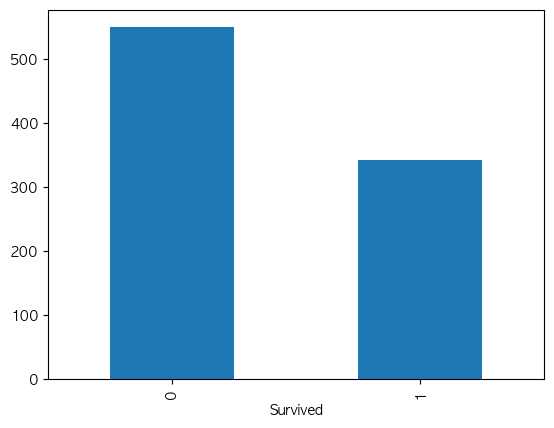

In [7]:
surv.plot(kind='bar')

In [8]:
surv = surv.rename(index={0:'사망', 1:'생존'})

In [9]:
surv.index = ['사망', '생존']
surv

사망    549
생존    342
Name: count, dtype: int64

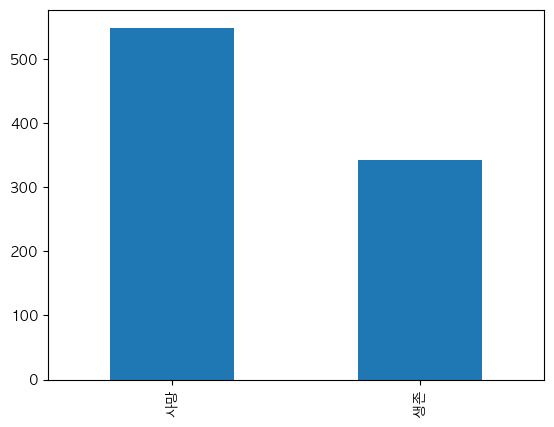

In [10]:
surv.plot(kind='bar')
plt.show()

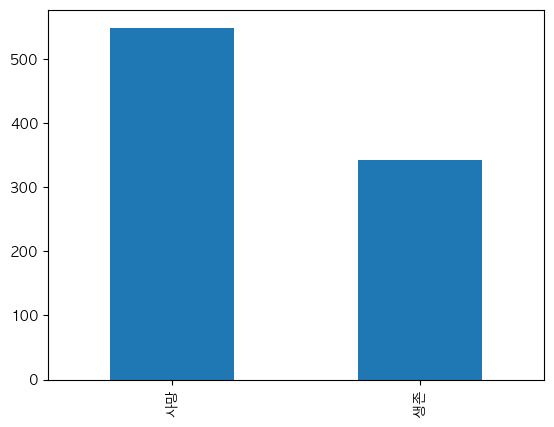

In [11]:
surv.plot.bar()
plt.show()

#### 타이타닉호 승객의 성별 사망/생존 비율

In [12]:
sex_surv = df[['Sex','Survived']].value_counts(sort=False)
sex_surv

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

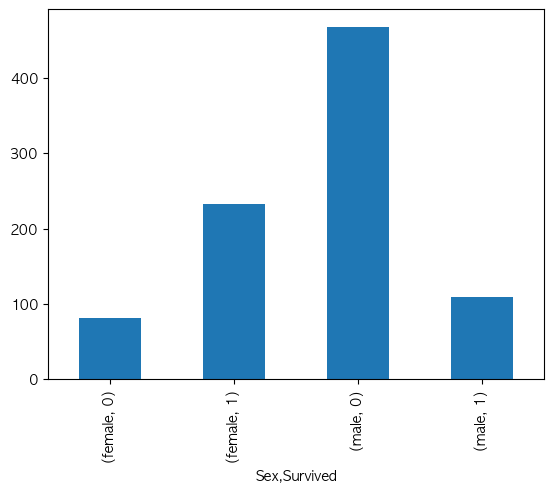

In [13]:
sex_surv.plot.bar()
plt.show()

In [14]:
sex_surv.index

MultiIndex([('female', 0),
            ('female', 1),
            (  'male', 0),
            (  'male', 1)],
           names=['Sex', 'Survived'])

In [15]:
sex_surv2 = sex_surv.unstack()
sex_surv2 = sex_surv2.rename(columns={0:'사망', 1:'생존'})
sex_surv2

Survived,사망,생존
Sex,,
female,81,233
male,468,109


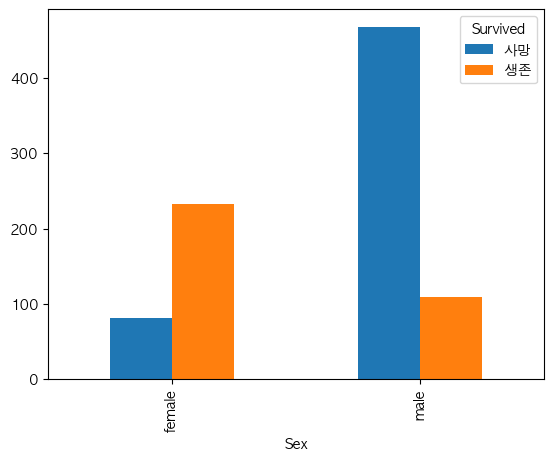

In [16]:
sex_surv2.plot.bar()
plt.show()

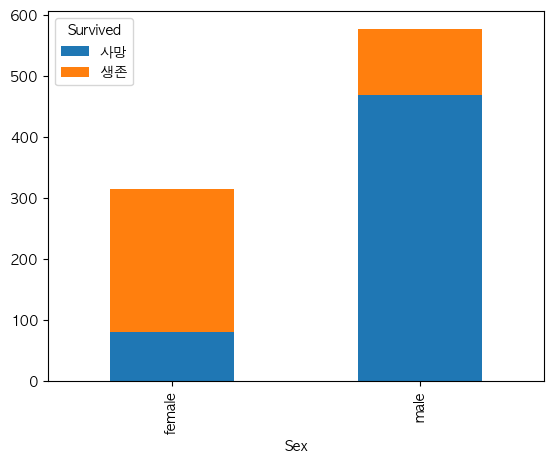

In [17]:
#stacked column chart
sex_surv2.plot.bar(stacked=True)
plt.show()

In [18]:
df2 = pd.DataFrame(np.random.randint(10, size=(10,4)), columns='a b c d'.split())
df2

,a,b,c,d
0,4,4,8,6
1,6,5,4,0
2,9,1,7,0
3,6,1,1,3
4,8,2,9,3
5,0,7,4,1
6,5,0,9,6
7,2,4,7,5
8,5,5,9,9
9,4,1,5,3


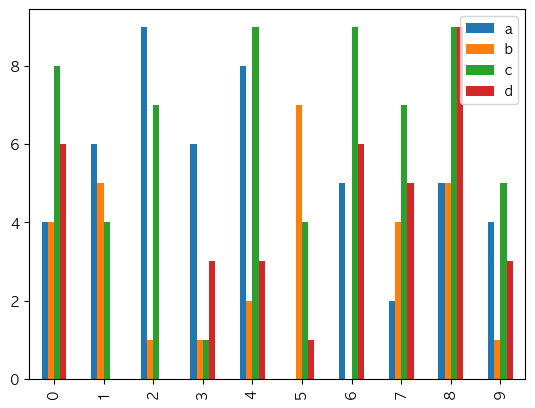

In [19]:
df2.plot.bar()
plt.show()

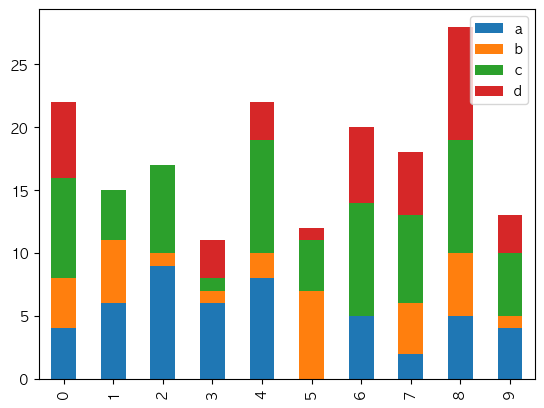

In [20]:
df2.plot.bar(stacked=True)
plt.show()

### 2) 파이그래프(pie)

**타이타닉호 승객의 사망/생존 비율**

In [21]:
surv

사망    549
생존    342
Name: count, dtype: int64

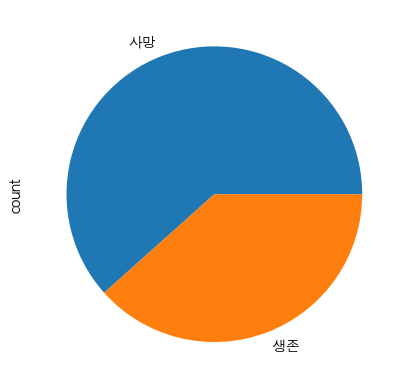

In [22]:
surv.plot.pie()
plt.show()

In [23]:
df3 = pd.Series(np.random.randint(10, size=(4,)), index='a b c d'.split())
df3.name = 'Series cnt'
df3

a    7
b    9
c    8
d    0
Name: Series cnt, dtype: int64

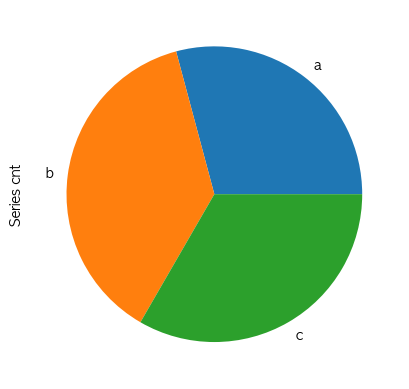

In [24]:
df3.plot.pie()
plt.show()

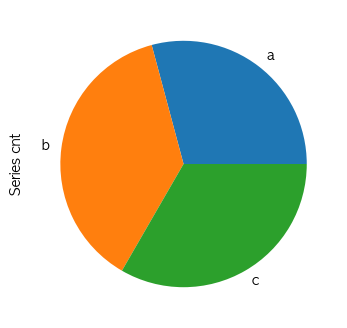

In [25]:
df3.plot(kind='pie', figsize=(4,4)) #figsize 기본 6*6 크기 줄이기 가능
plt.show()

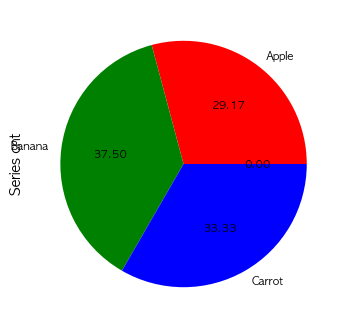

In [26]:
df3.plot(kind='pie', figsize=(4,4), labels=['Apple', 'Banana', 'Carrot', 'Melon'], 
         colors=['r','g','b','y'], autopct='%.2f', fontsize=8) #autopct - percent 보기
plt.show()

In [27]:
df4 = pd.DataFrame(np.random.randint(10, size=(4,2)), 
                   index='a b c d'.split(), 
                   columns=['X', 'Y'])
df4

,X,Y
a,5,5
b,5,2
c,0,4
d,7,1


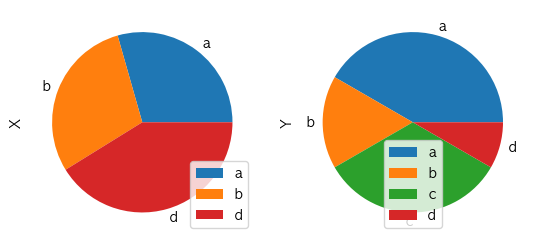

In [28]:
df4.plot(kind='pie', subplots=True)
plt.show()

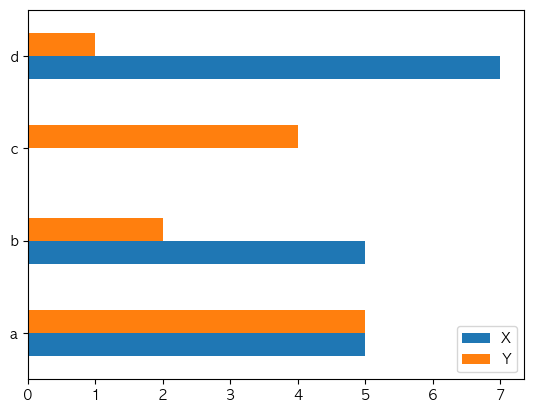

In [29]:
df4.plot.barh()
plt.show()

## 2. 수치형 데이터 시각화

- 선그래프, 히스토그램, 박스플롯, 산점도

### 1) 히스토그램(histogram)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


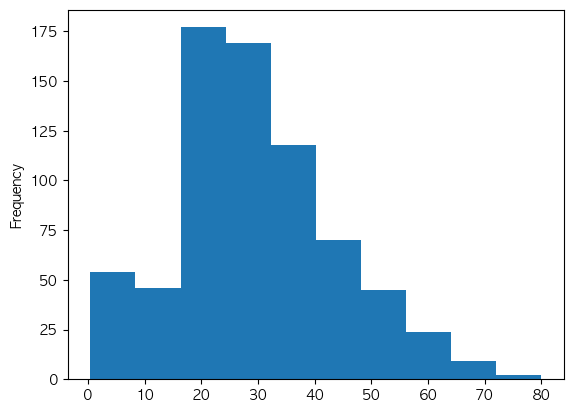

In [31]:
df.Age.plot(kind='hist') #kind='hist' -> 구간 나누기 히스토그램
plt.show()

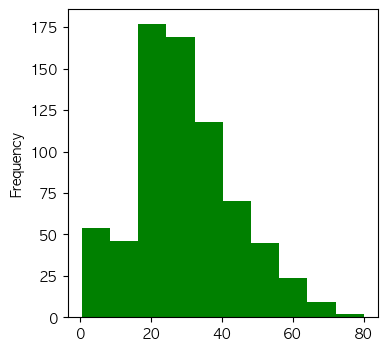

In [32]:
df.Age.plot(kind='hist', color='g', figsize=(4,4))
plt.show()

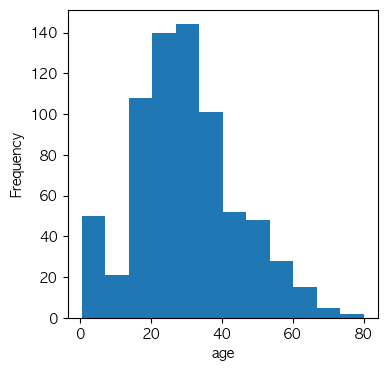

In [33]:
df.Age.plot(kind='hist', bins=12, figsize=(4,4), xlabel='age')
plt.show()

In [34]:
df5 = pd.DataFrame({'A':np.random.randn(1000)+1, 
                    'B':np.random.randn(1000), 
                    'C':np.random.randn(1000)-1})

df5

,A,B,C
0,-1.217904,-0.296304,0.742554
1,1.259077,-0.293460,-1.705109
2,3.555100,0.534496,-1.710511
3,2.530701,-1.816986,0.200521
4,0.486046,0.879904,0.019951
...,...,...,...
995,2.469326,-0.922492,-1.727747
996,1.777324,1.095745,0.912690
997,1.184668,-0.535400,-0.572963
998,2.289828,1.376702,0.041747


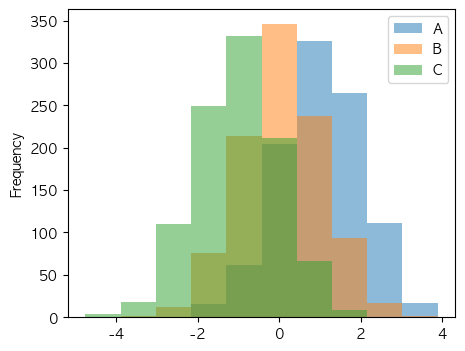

In [35]:
df5.plot.hist(figsize=(5,4), alpha=0.5) #alpha 불투명도
plt.show()

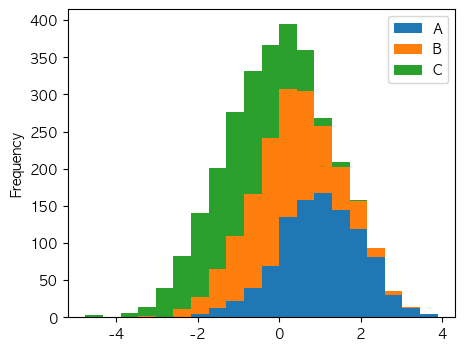

In [36]:
df5.plot.hist(bins=20, figsize=(5,4), stacked=True)
plt.show()

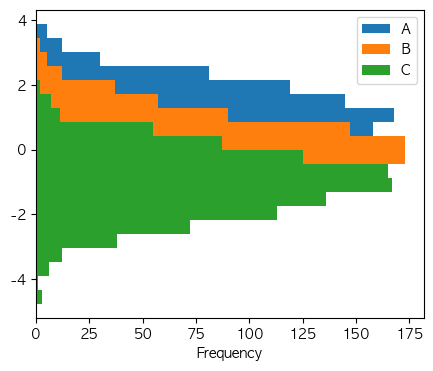

In [37]:
df5.plot.hist(bins=20, figsize=(5,4), orientation='horizontal')
plt.show()

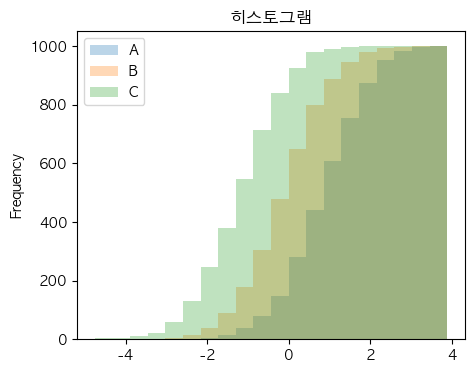

In [38]:
df5.plot.hist(bins=20, figsize=(5,4), cumulative=True, alpha=0.3, title='히스토그램')
plt.show()

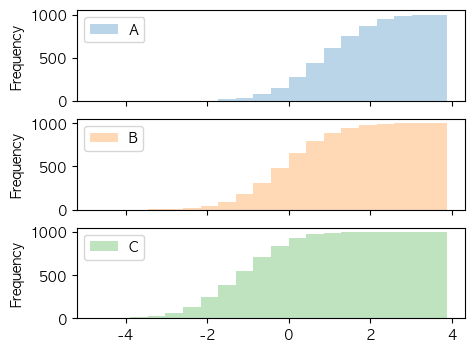

In [39]:
df5.plot.hist(bins=20, figsize=(5,4), cumulative=True, alpha=0.3, subplots=True)
plt.show()

### 2) 박스플롯(box-plot)

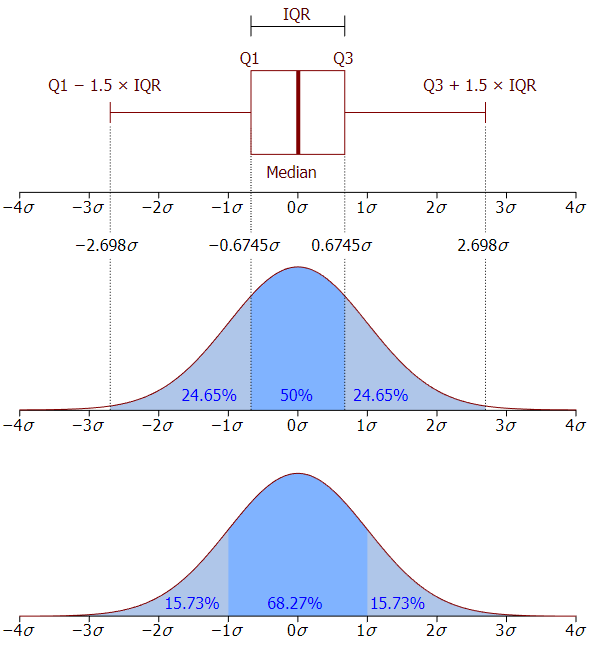

In [40]:
df.Age.skew() #정규분포인 경우

0.38910778230082704

In [41]:
pd.Series(np.random.randn(3000)).skew()

-0.000719197267001753

In [43]:
df.info() #Age 결측치가 있으면 무조건 float로 나옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
df.Age.kurt() #첨도 

0.17827415364210353

In [46]:
pd.Series(np.random.randn(3000)).kurt() #균등하게 분포될 수록 0에서 멀어짐

-0.07288902096794159

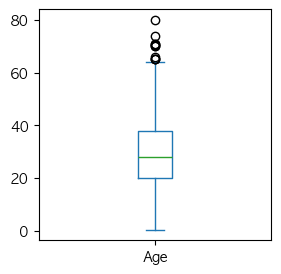

In [49]:
df.Age.plot(kind='box', figsize=(3,3))
plt.show()

In [50]:
df2 = pd.DataFrame(np.random.rand(10,5),
                  columns=['A','B','C','D','E'])
df2

,A,B,C,D,E
0,0.732936,0.081652,0.280258,0.900597,0.424707
1,0.971023,0.997943,0.618548,0.233427,0.093092
2,0.892056,0.879949,0.311321,0.210324,0.589676
3,0.591900,0.106117,0.055999,0.946589,0.939000
4,0.331286,0.547695,0.202565,0.435134,0.532374
5,0.013918,0.182572,0.033054,0.705538,0.895702
6,0.117400,0.550301,0.590237,0.869035,0.282547
7,0.592065,0.154902,0.033080,0.612019,0.668893
8,0.105099,0.171728,0.196224,0.849023,0.271168
9,0.546924,0.570747,0.901222,0.930793,0.767034


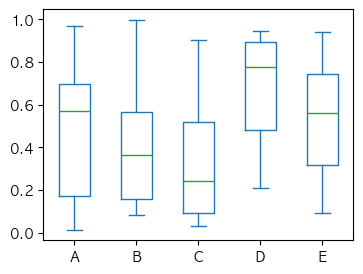

In [52]:
df2.plot.box(figsize=(4,3))
plt.show()

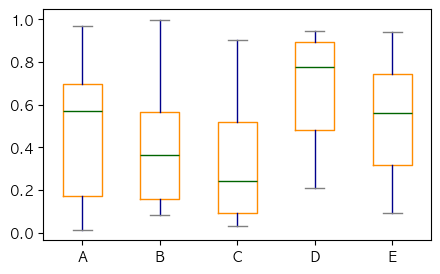

In [53]:
df2.plot.box(color={'medians':'DarkGreen', 
                    'boxes': 'DarkOrange', 
                    'whiskers': 'DarkBlue', 
                    'caps':'Gray'}, figsize=(5,3), sym = 'r+')
plt.show()

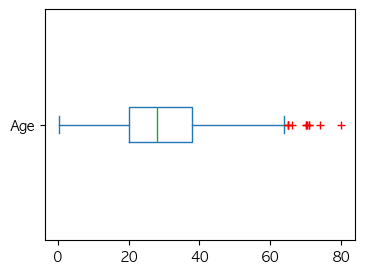

In [56]:
df.Age.plot.box(figsize=(4,3), sym='r+', vert=False)
plt.show()

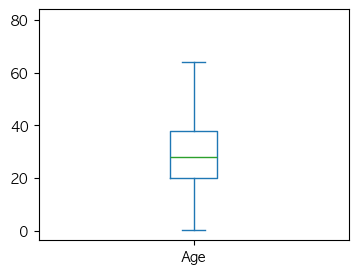

In [55]:
df.Age.plot.box(figsize=(4,3), sym='r-')
plt.show()

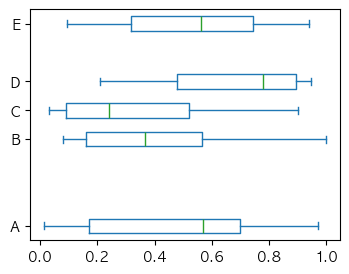

In [58]:
df2.plot.box(figsize=(4,3), vert=False, positions=[1,4,5,6,8])
plt.show()

### 3) 선그래프(line)

**선 그래프는 시간별 추이,변화량을 비교할 때 사용**

In [59]:
df3 = pd.DataFrame({'경유': [2100, 2050, 2000, 2010, 2150, 2090], 
                   '휘발유': [1900, 1950, 1800, 1955, 1970, 1920]}, 
                  index=['1월', '2월', '3월', '4월', '5월', '6월'])
df3

,경유,휘발유
1월,2100,1900
2월,2050,1950
3월,2000,1800
4월,2010,1955
5월,2150,1970
6월,2090,1920


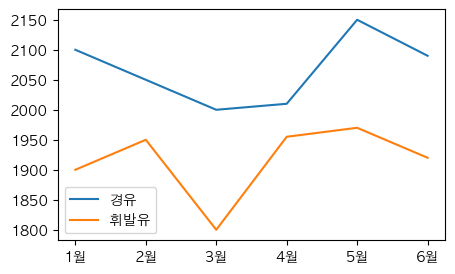

In [61]:
df3.plot(figsize=(5,3))
plt.show()

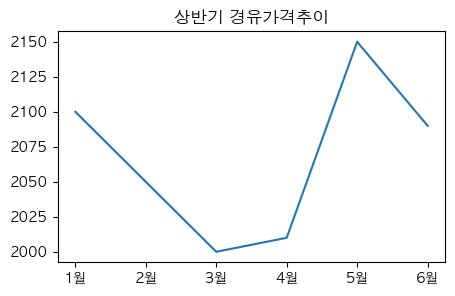

In [63]:
df3.경유.plot(figsize=(5,3), title='상반기 경유가격추이')
plt.show()

### 4) 산점도(scatterplot)

**산점도(scatter plot) : 두 변수간의 상관성**

In [71]:
df4 = pd.DataFrame({'height': [165, 177, 160, 173, 185, 160, 175], 
                   'weight': [62, 67, 55, 74, 90, 49, 64]})
df4

,height,weight
0,165,62
1,177,67
2,160,55
3,173,74
4,185,90
5,160,49
6,175,64


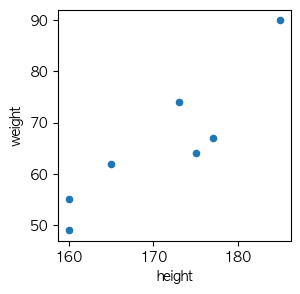

In [72]:
df4.plot(kind = 'scatter', x='height', y='weight', figsize=(3,3))
plt.show()

In [70]:
df4.corr()

,height,weight
height,1.00000,0.53595
weight,0.53595,1.00000


In [73]:
df5 = pd.DataFrame(np.random.rand(50,4),
                  columns='A B C D'.split())
df5.head()

,A,B,C,D
0,0.971470,0.413487,0.595457,0.395384
1,0.032218,0.347263,0.769514,0.403614
2,0.734583,0.962714,0.960598,0.724889
3,0.725774,0.927723,0.489797,0.164057
4,0.222627,0.595421,0.610152,0.751451


In [74]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


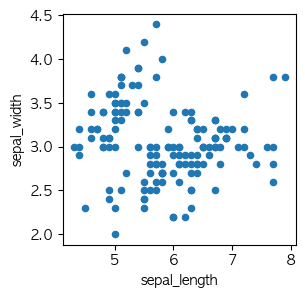

In [77]:
iris.plot.scatter(x='sepal_length', y='sepal_width', figsize=(3,3))
plt.show()

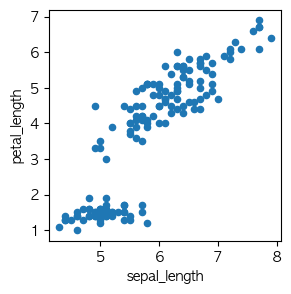

In [78]:
iris.plot.scatter(x='sepal_length', y='petal_length', figsize=(3,3))
plt.show()

In [79]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [80]:
iris.species = iris.species.astype('category')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [82]:
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

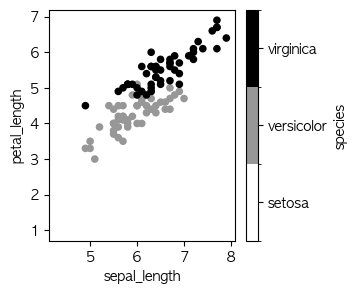

In [83]:
iris.plot.scatter(x='sepal_length', y='petal_length', 
                 c='species', figsize=(3,3))
plt.show()

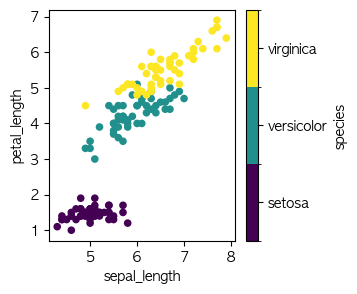

In [84]:
iris.plot.scatter(x='sepal_length', y='petal_length', 
                 c='species', figsize=(3,3), cmap='viridis')
plt.show()

In [85]:
df5 = pd.DataFrame(np.random.rand(50,4),
                  columns='A B C D'.split())
df5.head()

,A,B,C,D
0,0.121265,0.509358,0.114347,0.982902
1,0.344085,0.337611,0.034545,0.206759
2,0.254999,0.105954,0.613124,0.820894
3,0.468584,0.471995,0.450625,0.646477
4,0.064510,0.112130,0.317970,0.747802


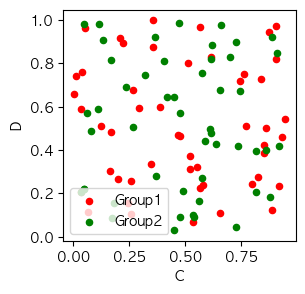

In [87]:
ax = df5.plot.scatter(x='A', y='B', figsize=(3,3), color='red', label='Group1')
df5.plot.scatter(x='C', y='D', color='green', label='Group2', ax=ax)

plt.show()

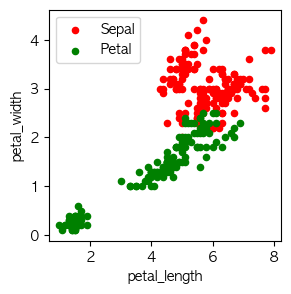

In [89]:
ax = iris.plot.scatter(x='sepal_length', y='sepal_width', 
                       figsize=(3,3), color='red', label='Sepal')
iris.plot.scatter(x='petal_length', y='petal_width', 
                 color='green', label='Petal', ax=ax)

plt.show()

In [90]:
df5['size'] = df5['C']*100
df5.head(3)

,A,B,C,D,size
0,0.121265,0.509358,0.114347,0.982902,11.434739
1,0.344085,0.337611,0.034545,0.206759,3.454506
2,0.254999,0.105954,0.613124,0.820894,61.312427


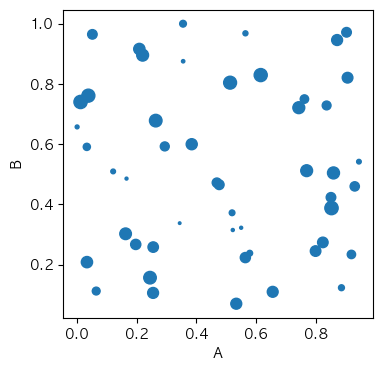

In [91]:
df5.plot.scatter(x='A', y='B', s='size', figsize=(4,4)) #s는 사이즈
plt.show() #버블 차트 형태(크기의 정보까지)

### 5) 산점도 행렬(scatterplot matrix)

In [92]:
iris.iloc[:, :-1].head() #맨 마지막 데이터 제외

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [93]:
iris.iloc[:, :-1].corr() #두변수간에 선형적 관계 / 1에 가까울수록 선형성이 강하다

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [94]:
from pandas.plotting import scatter_matrix

In [96]:
iris.iloc[:, :-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


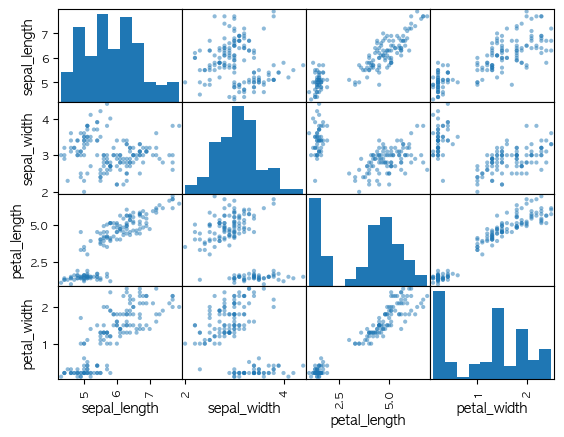

In [98]:
scatter_matrix(iris.iloc[:, :-1])
plt.show()

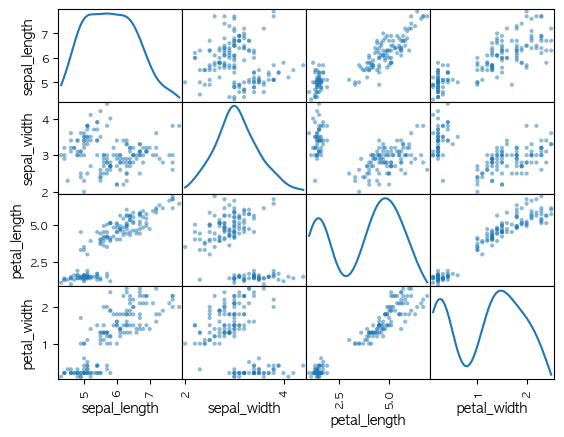

In [99]:
scatter_matrix(iris[:-1], diagonal='kde')
plt.show()
#선 그래프 봉이 2개면 2그룹 인 것

### 6) 밀도함수(density plot)

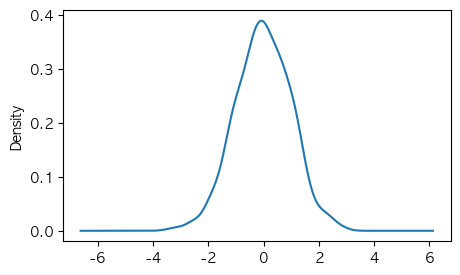

In [100]:
s = pd.Series(np.random.randn(1000))
s.plot.kde(figsize=(5,3))
plt.show()

### 7) 평행좌표 플롯(parallel coordinates plot)

In [101]:
from pandas.plotting import parallel_coordinates

In [102]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


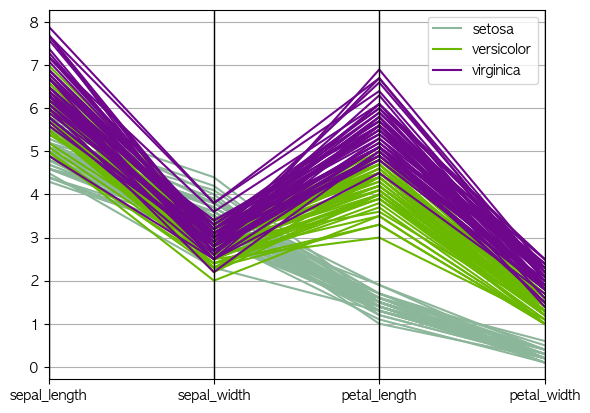

In [103]:
parallel_coordinates(iris, 'species')
plt.show()

-------------